In [1]:
from sympy import *

In [2]:
init_printing(use_latex=True)

In [3]:
T, k10, E1, R, k20, E2, Te, \
Ca, Cb, Cp, Cq, Topt = symbols('T k10 E1 R k20 E2 Te Ca Cb Cp Cq Topt', 
                         positive=True, real=True)
k1, k2, r = symbols('k1 k2 r', cls=Function)

# Kinetic model

## Kinetic constants

In [4]:
eq02 = Eq(k1(T), k10*exp(-E1/R/T))
eq03 = Eq(k2(T), k20*exp(-E2/R/T))

## Global reaction rate

In [5]:
eq01 = Eq(r(T), k1(T) * Ca * Cb - k2(T) * Cp * Cq)

In [6]:
eq01

In [7]:
eq06= Eq(eq01.lhs, eq01.rhs.subs({eq02.lhs:eq02.rhs,
                                 eq03.lhs:eq03.rhs}))

In [8]:
eq06

# Finding maximum reaction rate

The reaction rate is a function of conversion because the concentrations are, and the reaction temperature. However, as we need to find the temperature value that causes the maximum reaction rate, we should derive the Eq 06 with T while the conversion is kept constant.

In [9]:
eq07 = Eq(Derivative(eq06.lhs, T), Derivative(eq06.rhs, T).doit())

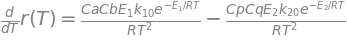

In [10]:
eq07

In [11]:
eq08 = Eq(Topt, solve(eq07.rhs, T)[0])

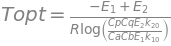

In [12]:
eq08

At the chemical equilibrium eq6 = 0, then

\begin{equation*}
\frac{Cp\,Cq}{Ca\,Cb} \frac{k_{20}}{k_{10}} = \exp\left(\frac{E_2 - E_1}{R\,Te}\right)
\end{equation*}

where $Te$ is the temperature at the chemical equilibrium

In [13]:
eq09 = Eq(Topt, eq08.rhs.subs((Cp*Cq*k20)/(Ca*Cb*k10), exp((E2 - E1)/R/Te)).simplify())

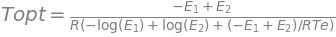

In [14]:
eq09

In [15]:
eq10 = Eq(Topt/Te, simplify(eq09.rhs/Te))

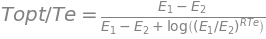

In [16]:
eq10